# Exploring bad image segmentations.

Ashley identified 908-3 and 913-3 as images from the validation set that appear to have segemented well but have low correlation between the human vs. AI measured vein length. This notebook explores why that is.

In [1]:
from os.path import join as j
from os.path import abspath

import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage.util import pad
from skimage.transform import rescale
from skimage.morphology import medial_axis

project_root = abspath("../")

## Load segmentation for image 908-3

The AI segmentation looks good, but has areas within the vein that were not segmented as vein.

In [2]:
img908 = io.imread(j(project_root,'data','interm','exmaple_run','908-3_probs.png')) / 2**16
seg908 = img908 > 0.9

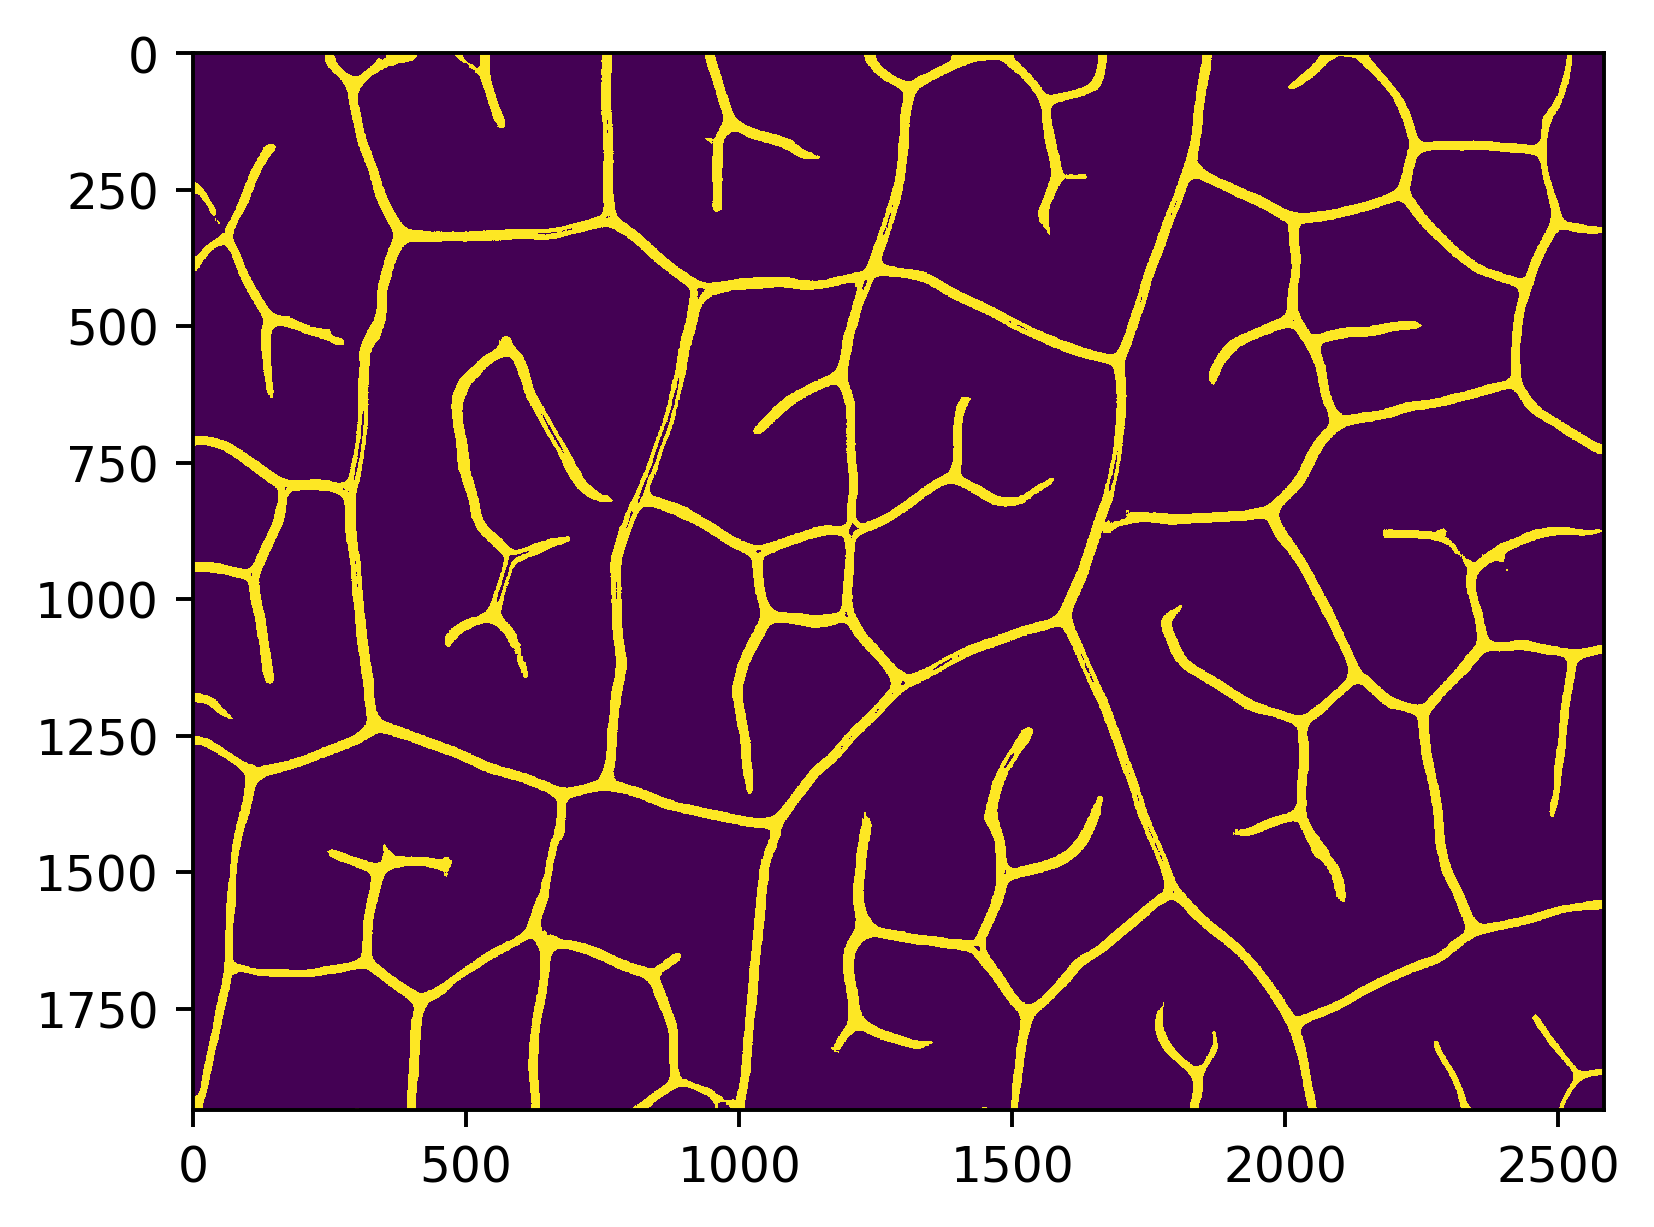

In [3]:
fig, ax1 = plt.subplots(dpi=350)
plt.imshow(seg908);

## Extract Medial Axis and Calculate Vein Length 
Vein length is claculated by summmming the pixels in the medial axis. The voids in the vein segmenetation affects the medial axis extaced by creating 2 "veins" that go around the void. There is also a lot of noise in the form of "veins" coming off the main medial axis due to the segmentation edge not being smooth.

__Note:__ What look like breaks in the main medial axis along the vein are results of the downsampling used to display the image in the notebook, they are in really fully intact.

Initial length: 40388 px


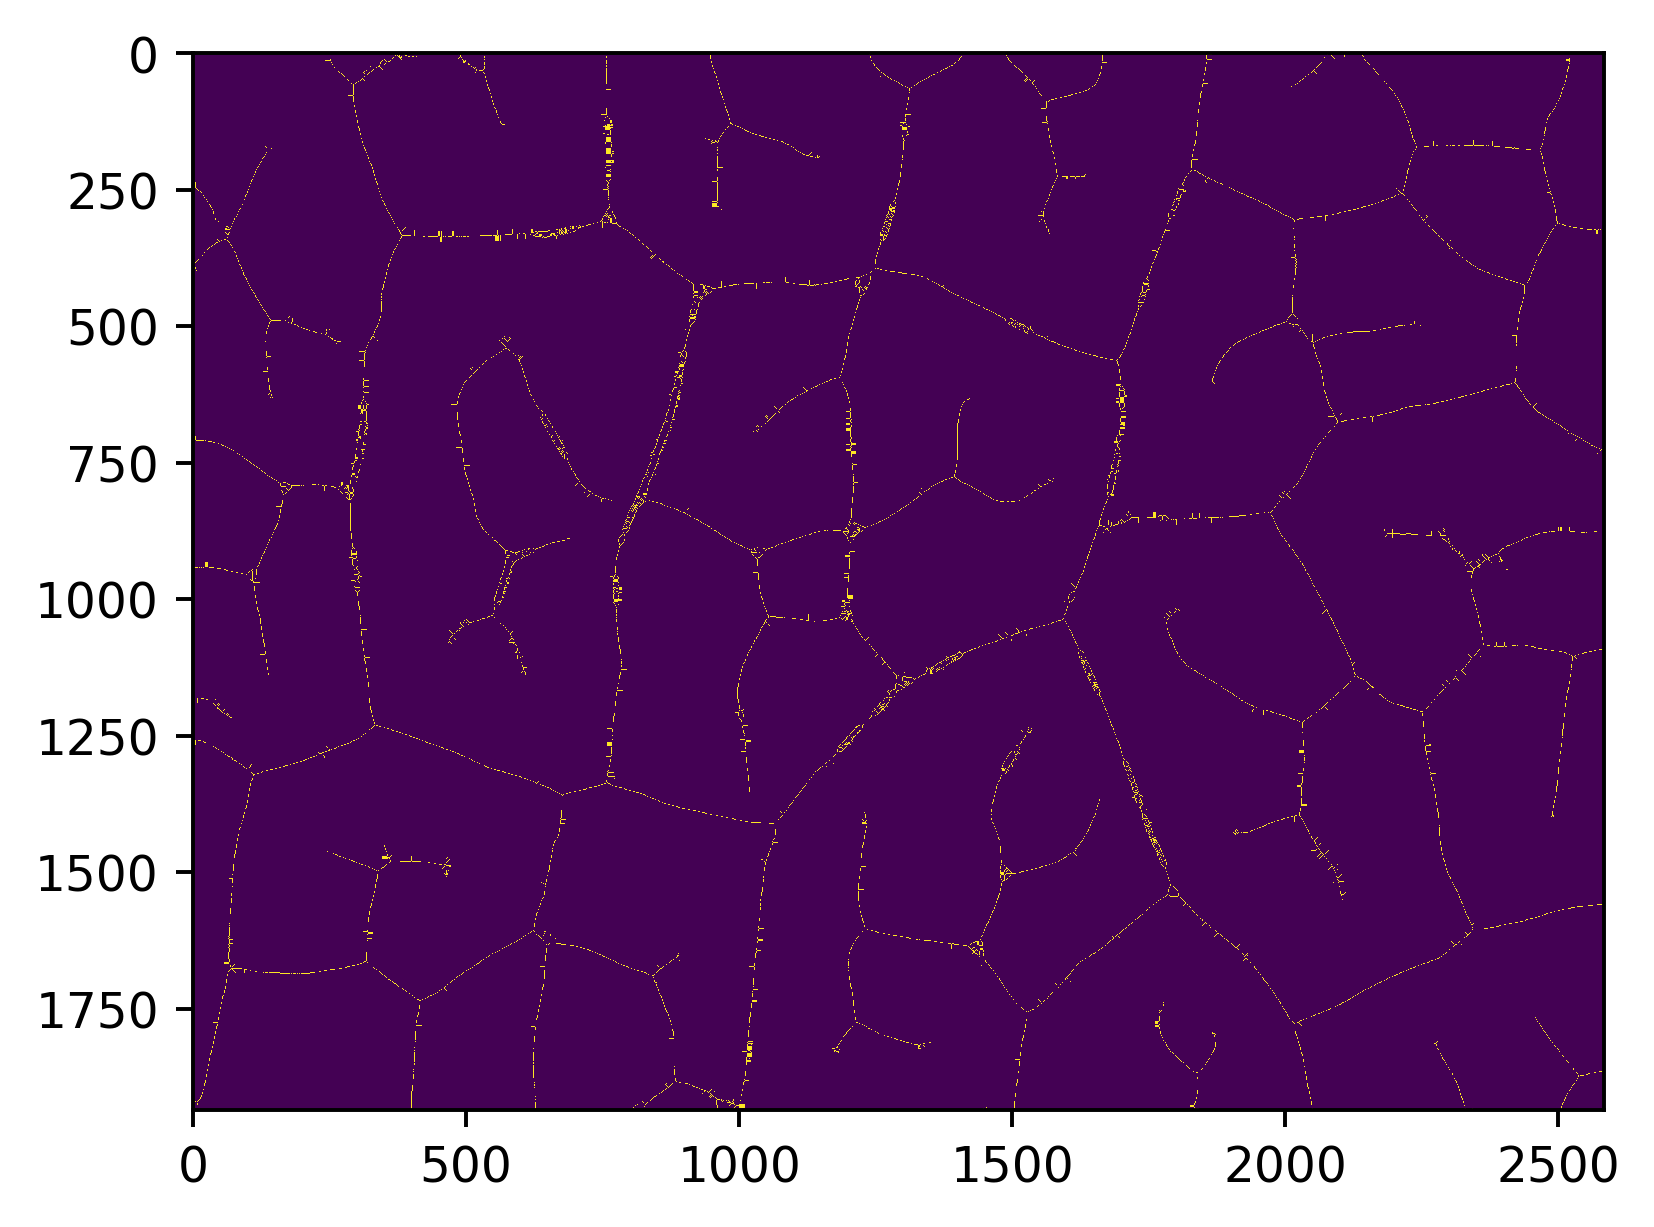

In [4]:
med908 = medial_axis(seg908)

plt.figure(dpi=350)
plt.imshow(med908)

print("Initial length: %d px"%(np.sum(med908)))

# Smooth the probabilities

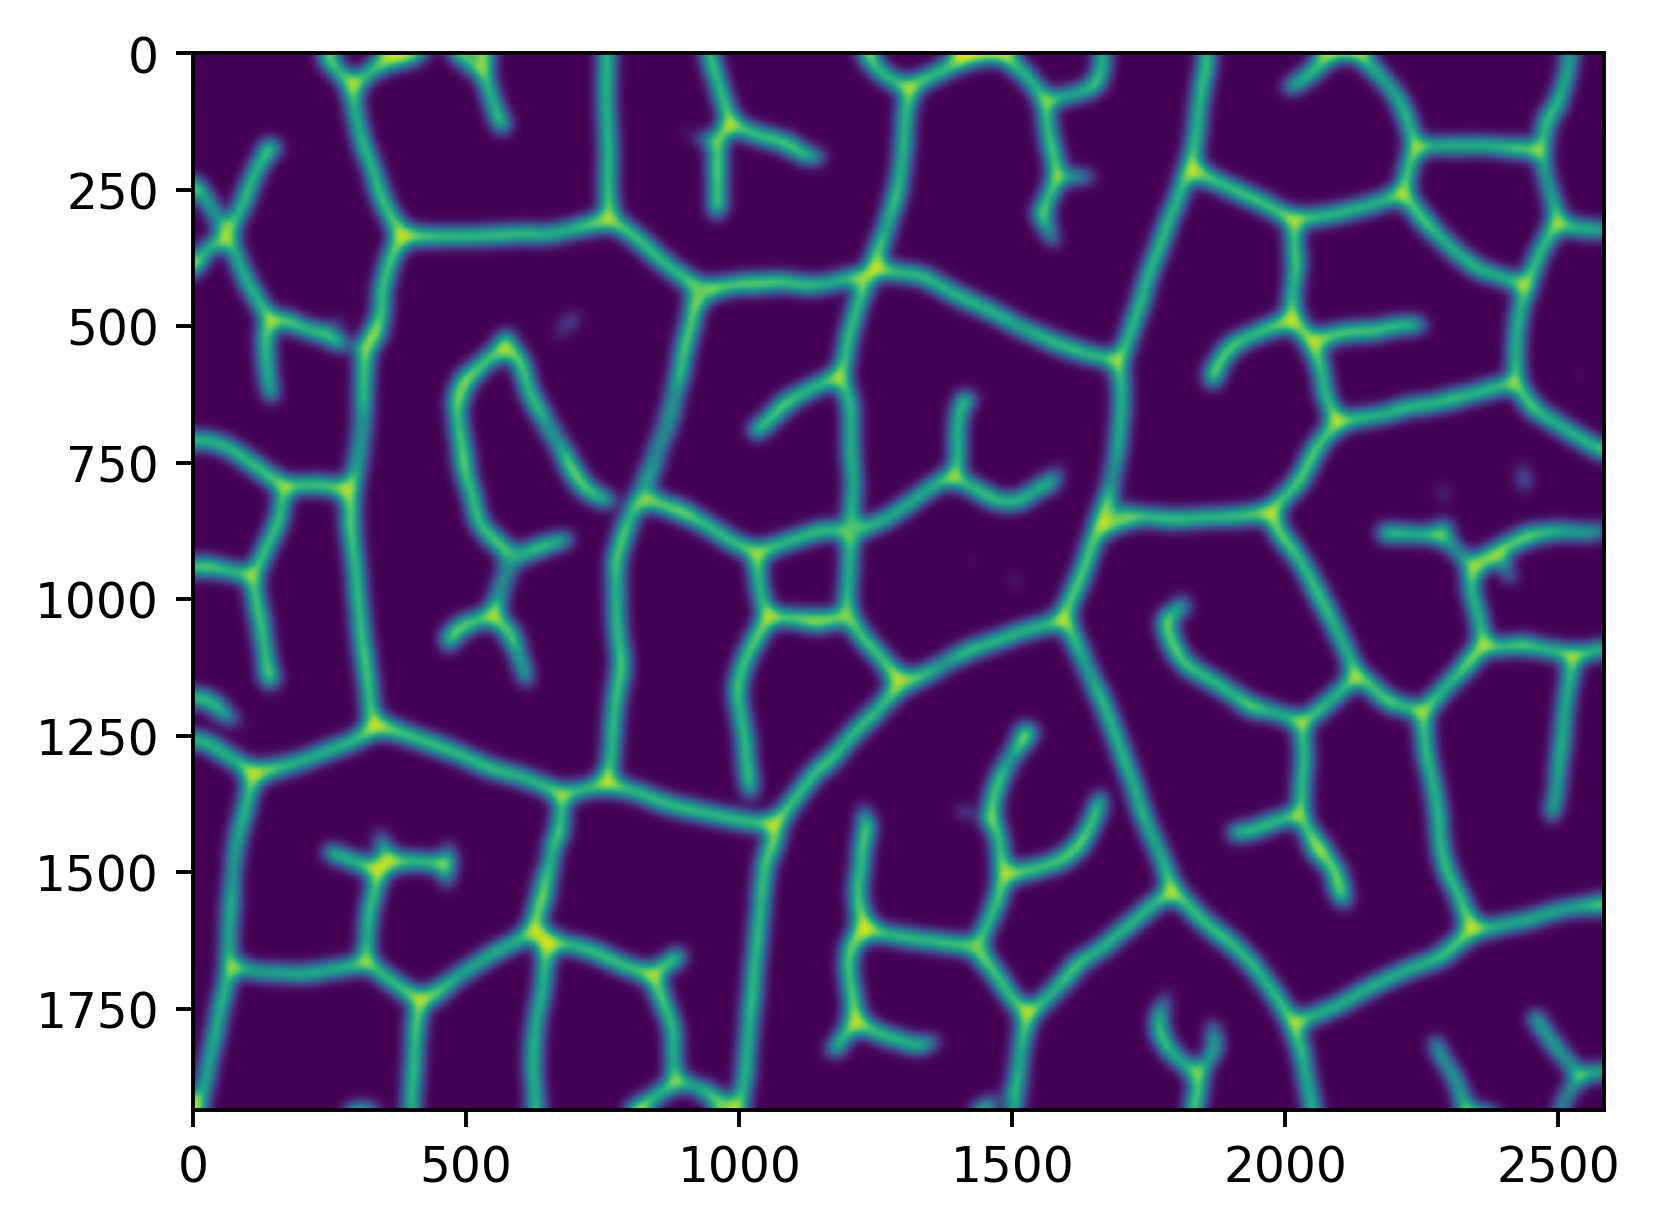

In [5]:
from skimage.filters import gaussian as gauss
gauss908 = gauss(img908,sigma=12)

plt.figure(dpi=350)
plt.imshow(gauss908);

#### Segmentation after smoothing

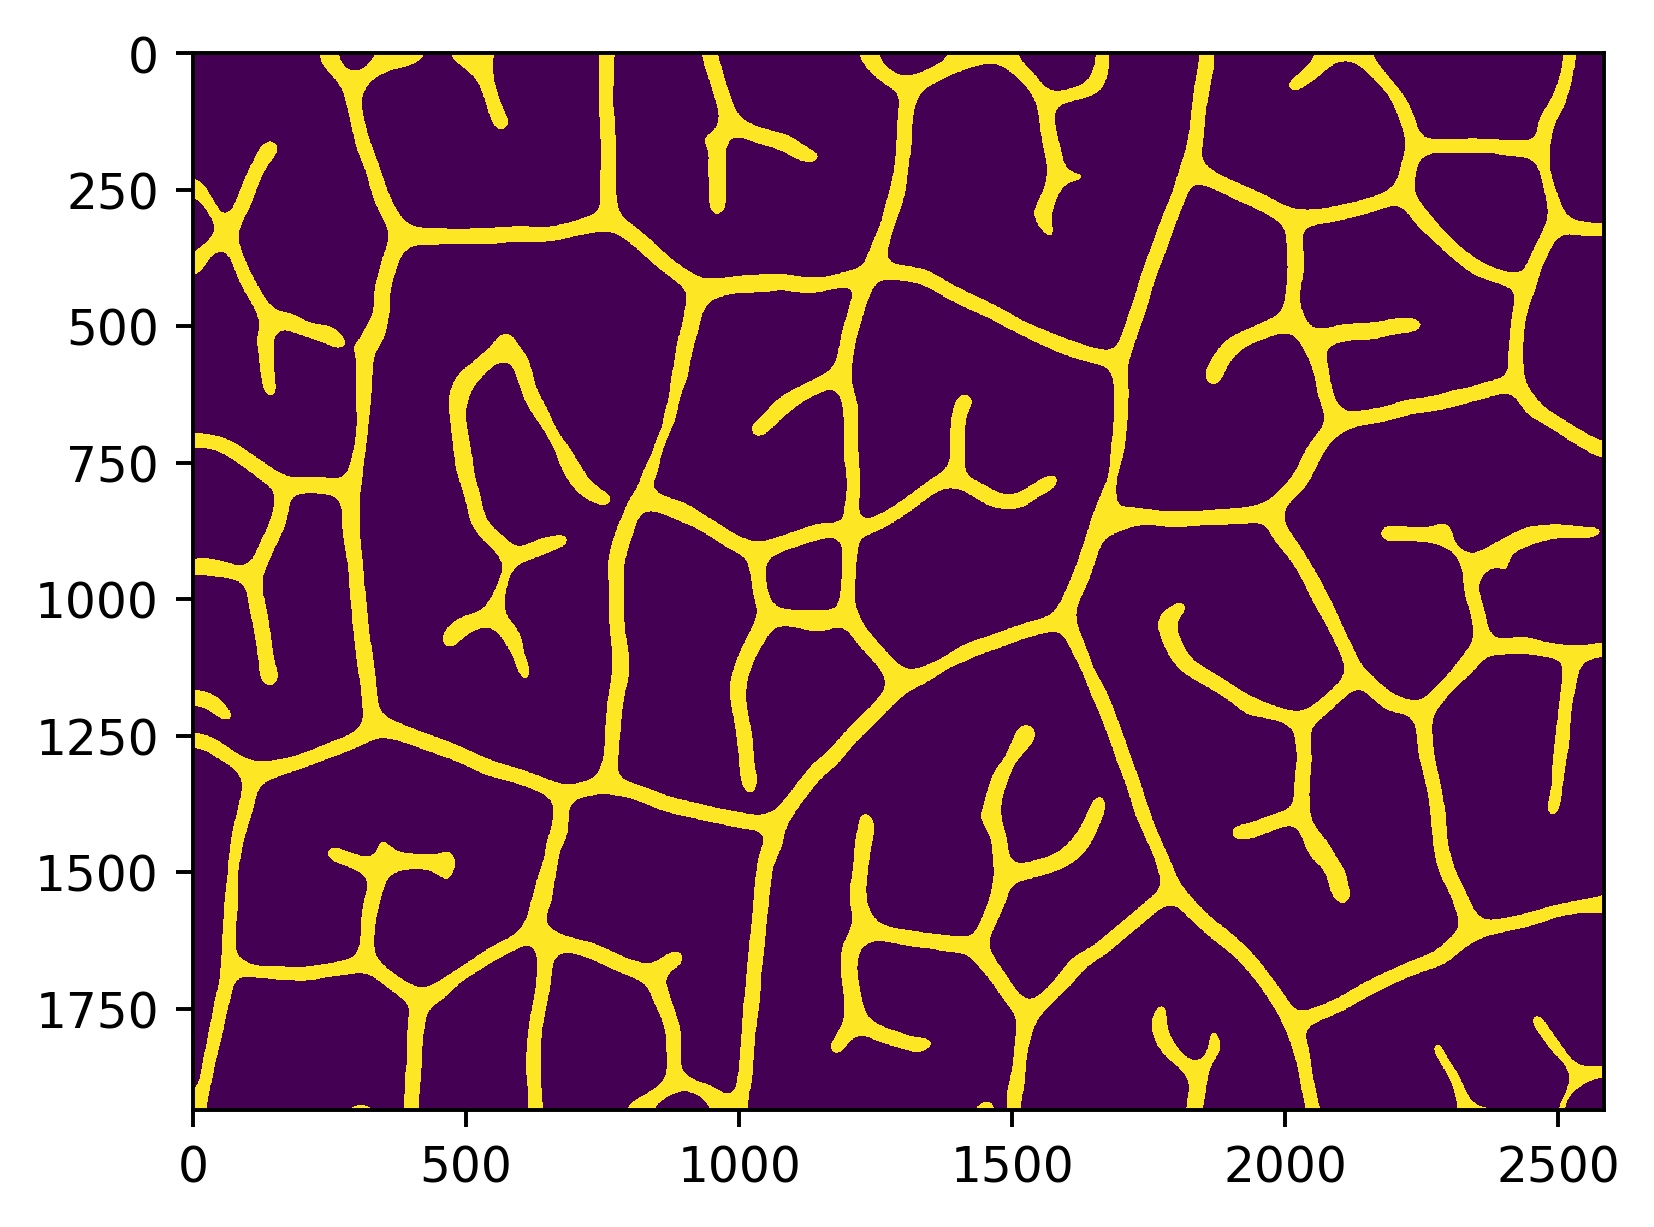

In [10]:
gauss_seg908 = gauss908 > 0.4

plt.figure(dpi=350)
plt.imshow(gauss_seg908);

### Medial axis after smoothing

After smoothing, medial axis looks much better. Looking at the results of all validation images, A length of 27,452 pixels is well within what would be expected for a human measured length of 908-3 (20,468 $\mu m$)

Length After Cleaning: 27452 px


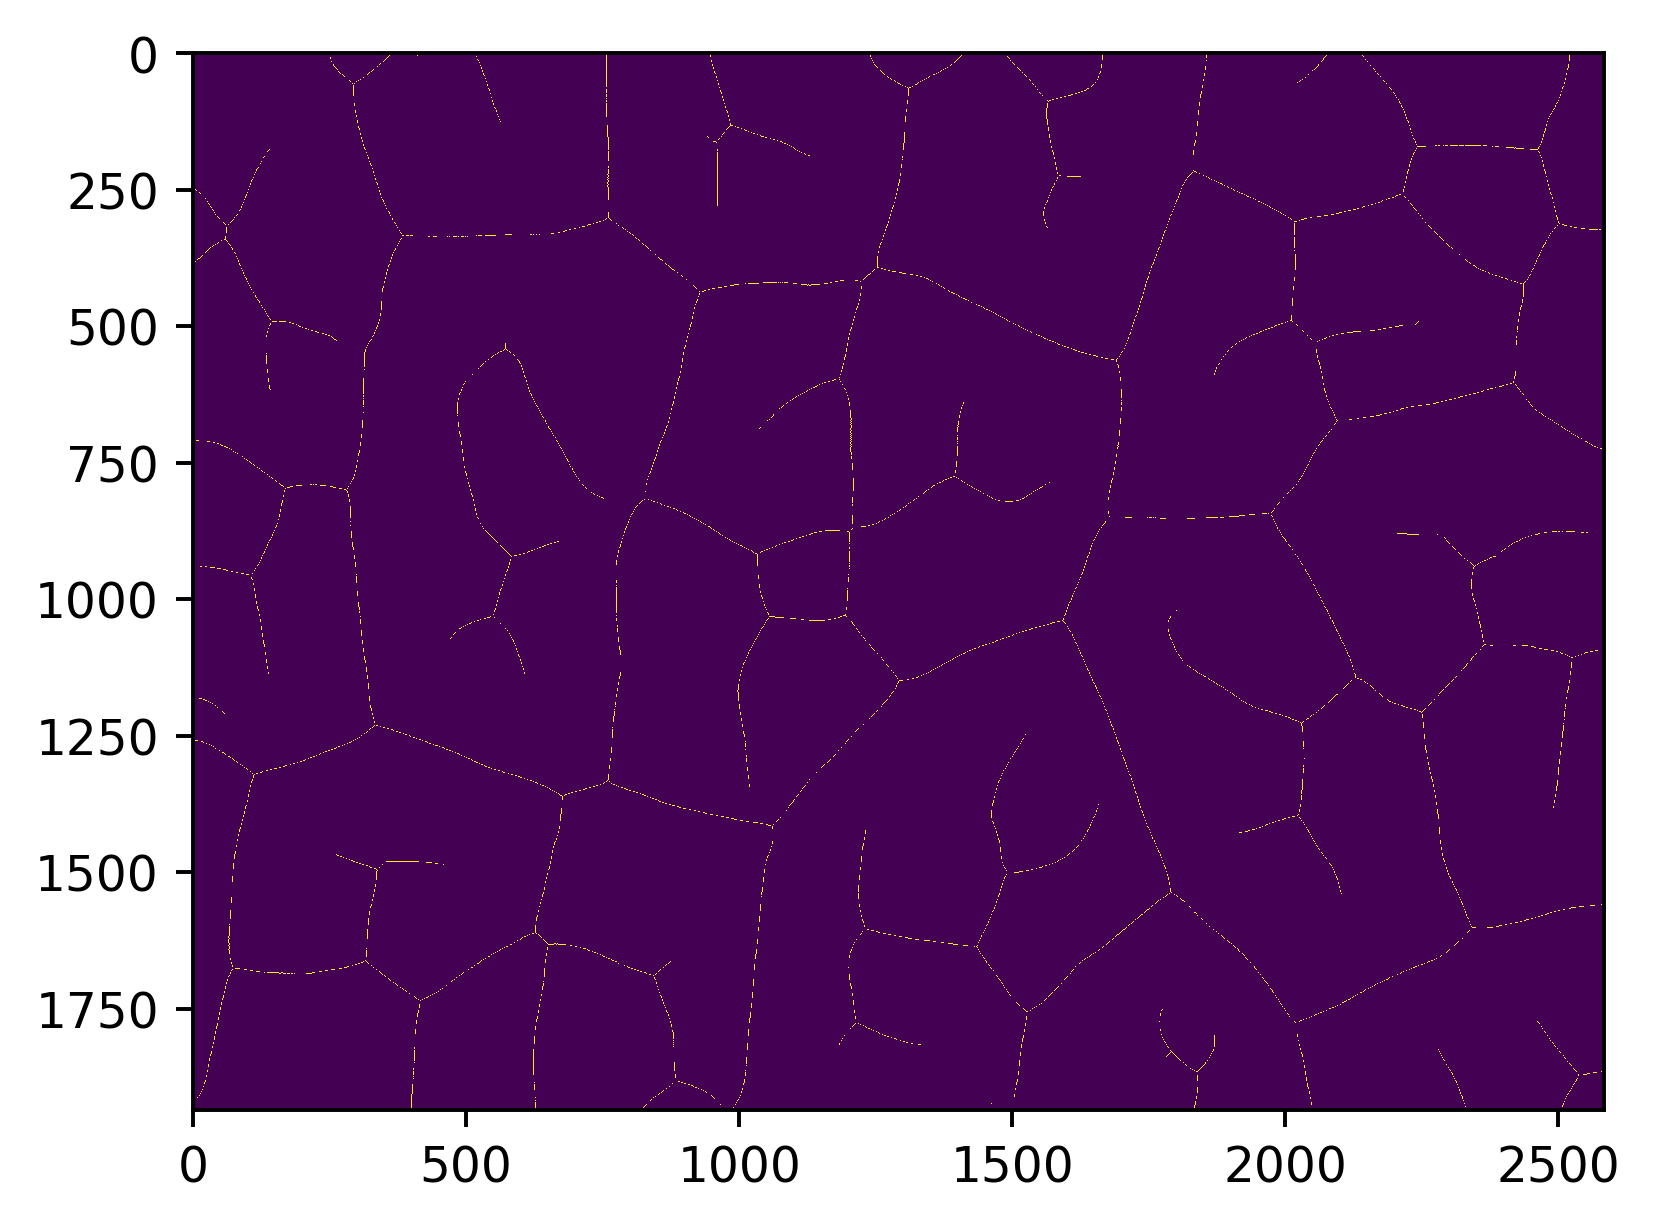

In [12]:
plt.figure(dpi=350)

cleaned_med908 = medial_axis(gauss_seg908)

plt.imshow(cleaned_med908)

print("Length After Cleaning: %d px"%(np.sum(cleaned_med908)))

## Check image 913-3

Raw Vein Length: 47036 px
Smoothed Vein Length: 24567 px


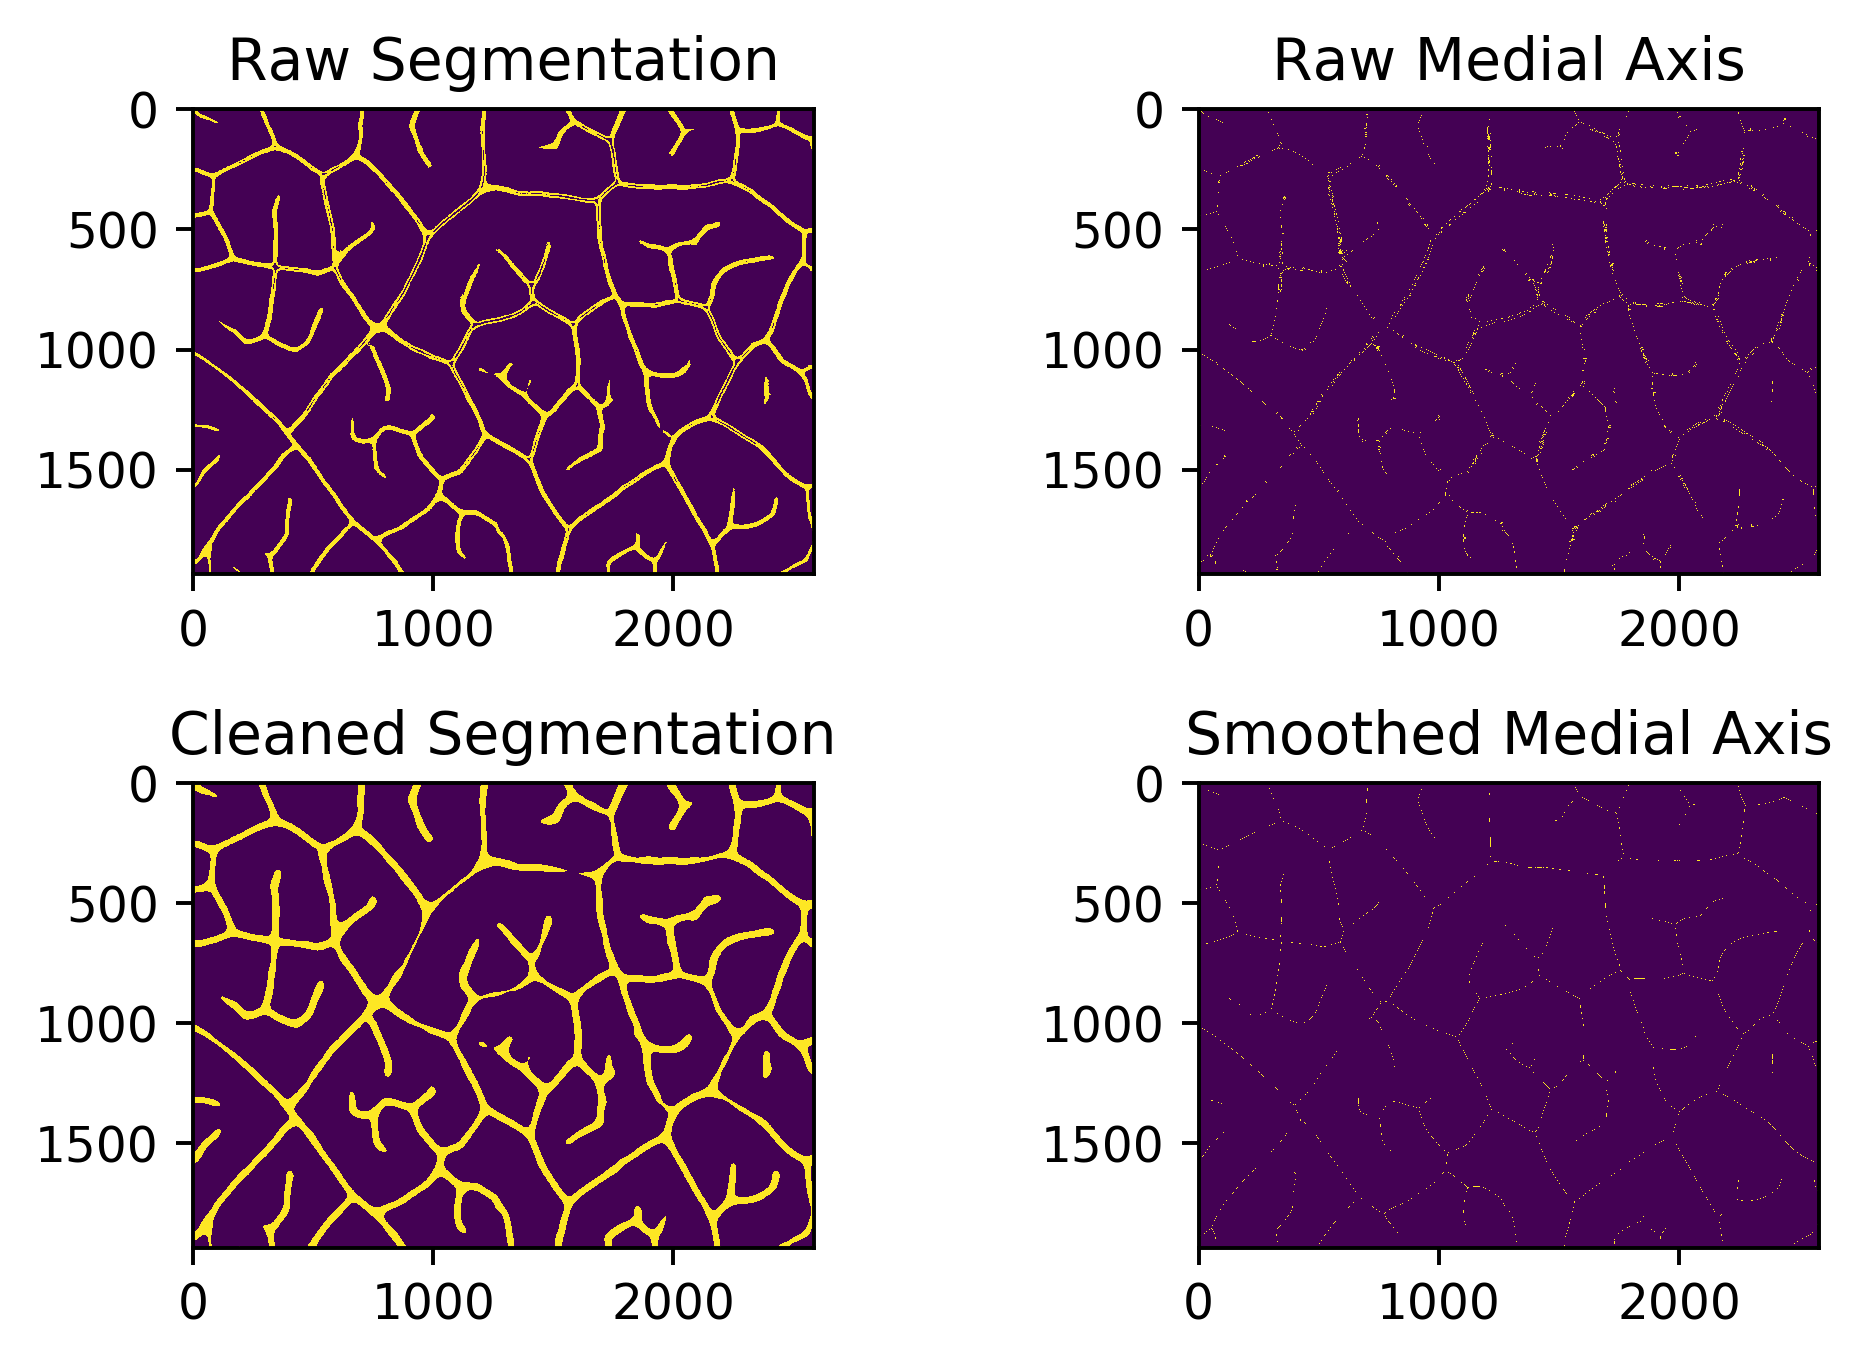

In [34]:
plt.figure(dpi=350)

img913 = io.imread(j(project_root,'data','interm','exmaple_run','913-3_probs.png')) / 2**16
seg913 = img913 > 0.9

#Raw segmentation
plt.subplot(2,2,1)
plt.imshow(seg913)
plt.title("Raw Segmentation")

#Raw medial axis
med913 = medial_axis(seg913)
plt.subplot(2,2,2)
plt.imshow(med913)
plt.title("Raw Medial Axis")

# Cleaned Segmentation
gauss913 = gauss(img913,sigma=12)
gauss_seg913 = gauss913 > 0.4
plt.subplot(2,2,3)
plt.imshow(gauss_seg913)
plt.title("Cleaned Segmentation")

# Cleaned Medial axis
gauss_med913 = medial_axis(gauss_seg913)
plt.subplot(2,2,4)
plt.imshow(gauss_med913)
plt.title("Smoothed Medial Axis")

plt.tight_layout()

print("Raw Vein Length: %d px"%(med913.sum(),))
print("Smoothed Vein Length: %d px"%(gauss_med913.sum(),))

## Check image 899-1

Raw Vein Length: 33883 px
Smoothed Vein Length: 25612 px


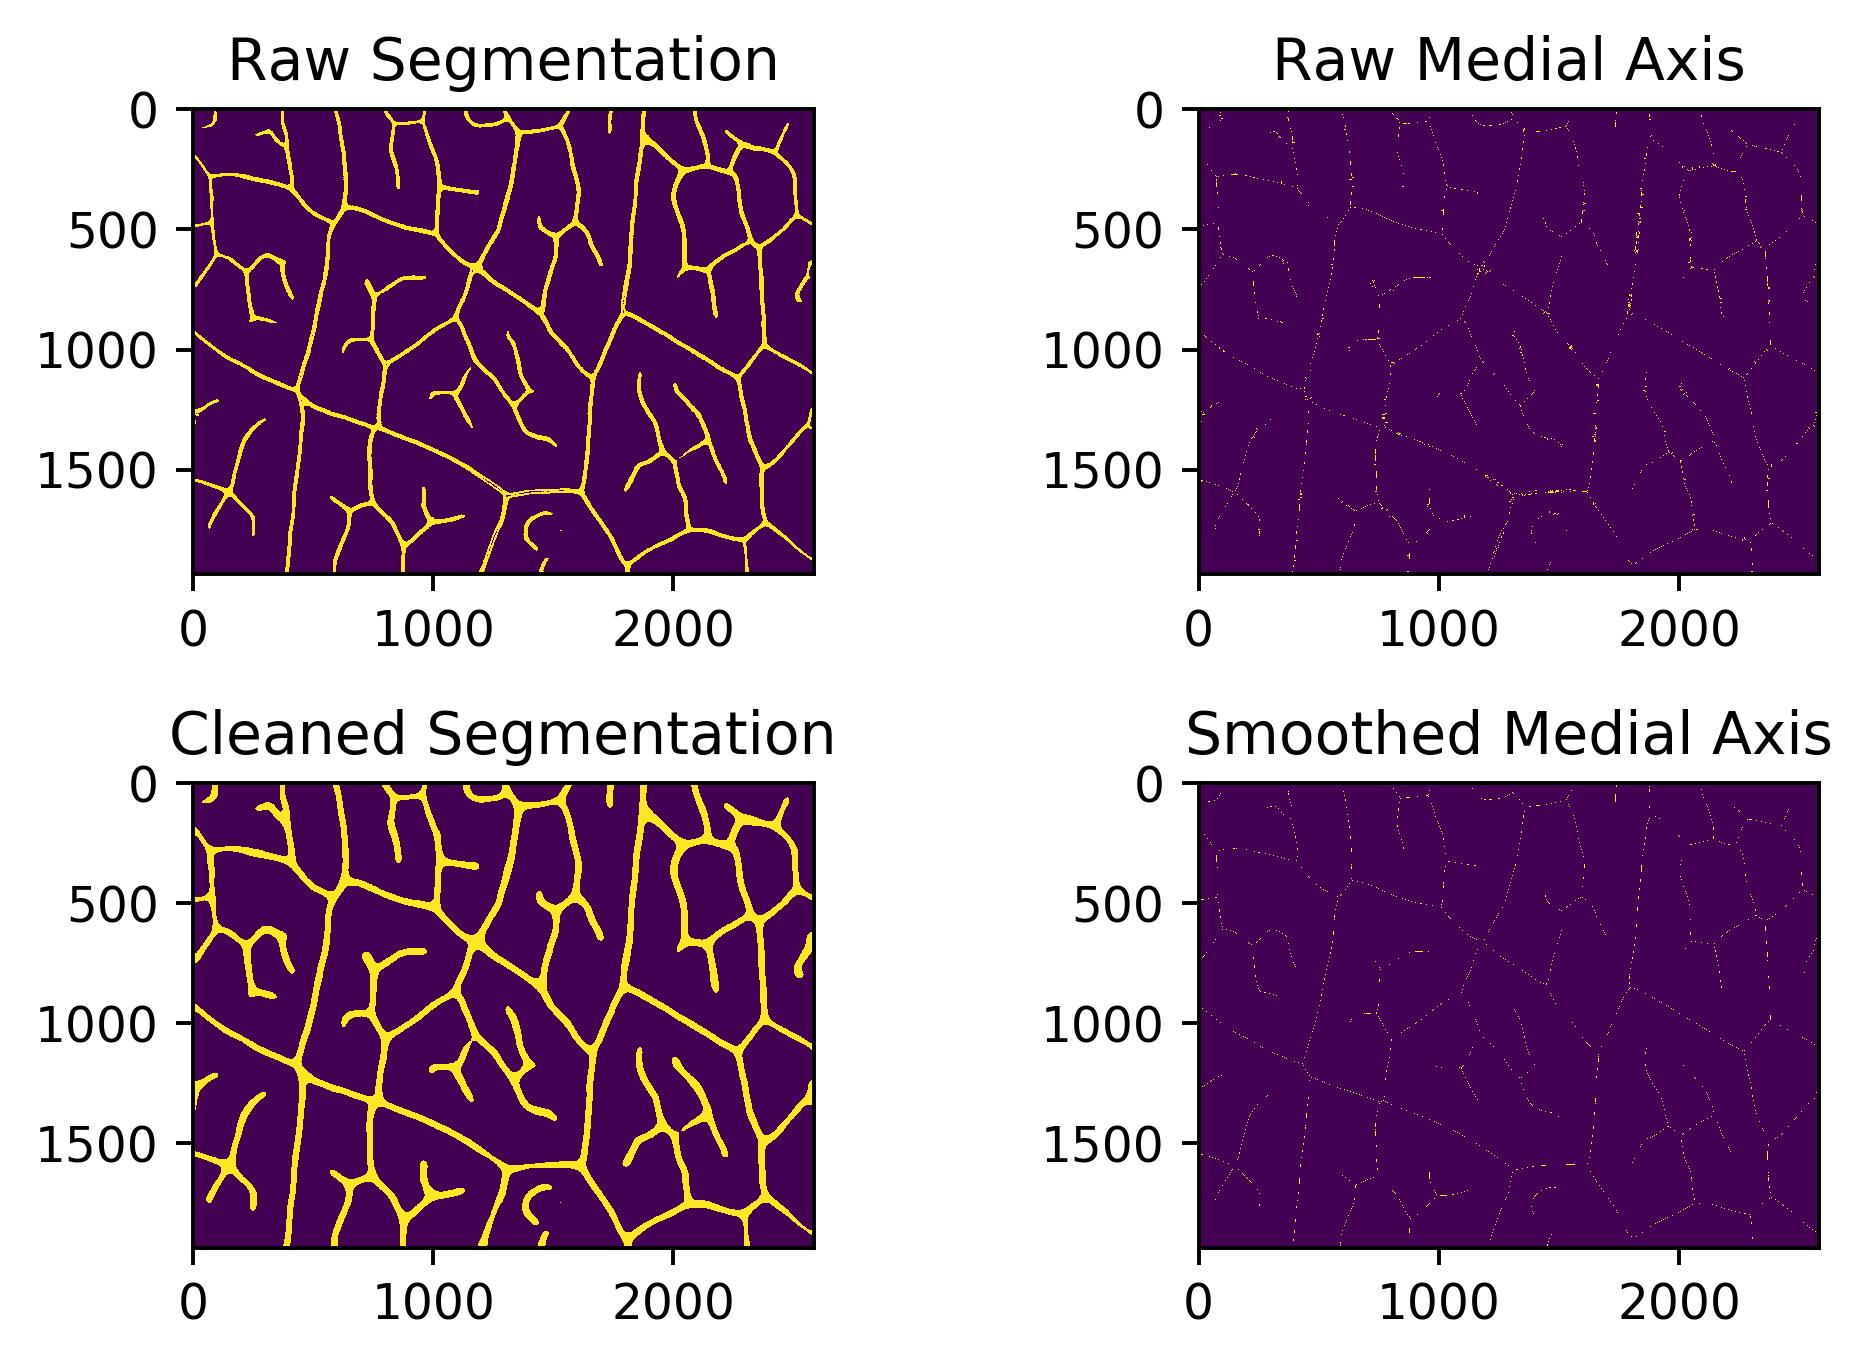

In [32]:
plt.figure(dpi=350)

img913 = io.imread(j(project_root,'data','interm','exmaple_run','899-1_probs.png')) / 2**16
seg913 = img913 > 0.9

#Raw segmentation
plt.subplot(2,2,1)
plt.imshow(seg913)
plt.title("Raw Segmentation")

#Raw medial axis
med913 = medial_axis(seg913)
plt.subplot(2,2,2)
plt.imshow(med913)
plt.title("Raw Medial Axis")

# Cleaned Segmentation
gauss913 = gauss(img913,sigma=12)
gauss_seg913 = gauss913 > 0.4
plt.subplot(2,2,3)
plt.imshow(gauss_seg913)
plt.title("Cleaned Segmentation")

# Cleaned Medial axis
gauss_med913 = medial_axis(gauss_seg913)
plt.subplot(2,2,4)
plt.imshow(gauss_med913)
plt.title("Smoothed Medial Axis")

plt.tight_layout()

print("Raw Vein Length: %d px"%(med913.sum(),))
print("Smoothed Vein Length: %d px"%(gauss_med913.sum(),))

## Check image 102-8

Image 102-8 has an underestimated vein length by AI. A lower segmentation cutoff was required for the smoothed probabilities than for the above images, suggesting a new cutoff will have to be determined experimentally. When the cutoff is lowered the estimated vein lenghts are similar between the the raw and smoothed images, as expected. 

Raw Vein Length: 17761 px
Smoothed Vein Length: 17161 px


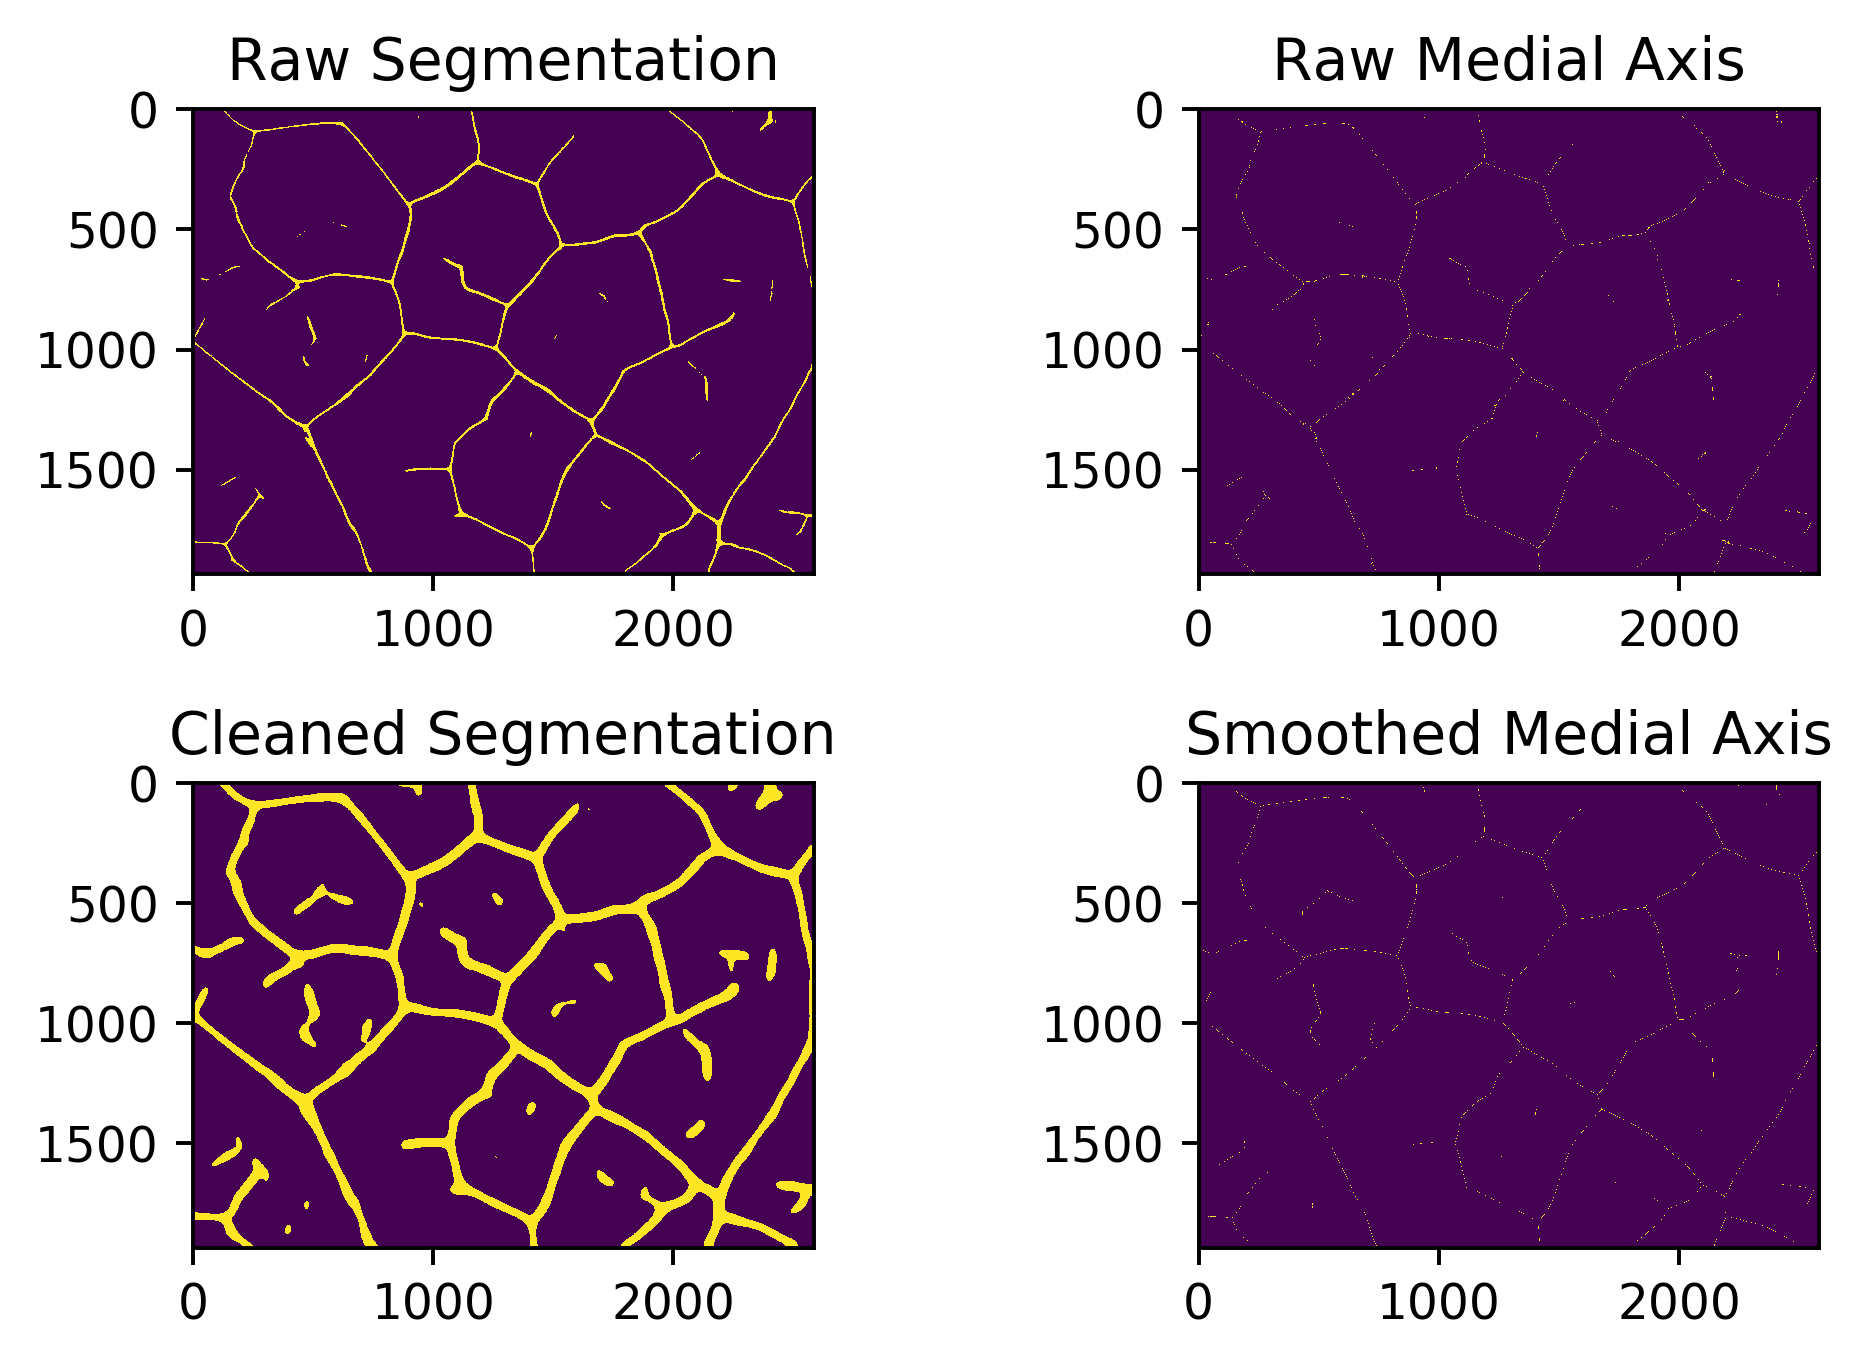

In [35]:
plt.figure(dpi=350)

img913 = io.imread(j(project_root,'data','interm','exmaple_run','102-8_probs.png')) / 2**16
seg913 = img913 > 0.9

#Raw segmentation
plt.subplot(2,2,1)
plt.imshow(seg913)
plt.title("Raw Segmentation")

#Raw medial axis
med913 = medial_axis(seg913)
plt.subplot(2,2,2)
plt.imshow(med913)
plt.title("Raw Medial Axis")

# Cleaned Segmentation
gauss913 = gauss(img913,sigma=12)
gauss_seg913 = gauss913 > 0.2
plt.subplot(2,2,3)
plt.imshow(gauss_seg913)
plt.title("Cleaned Segmentation")

# Cleaned Medial axis
gauss_med913 = medial_axis(gauss_seg913)
plt.subplot(2,2,4)
plt.imshow(gauss_med913)
plt.title("Smoothed Medial Axis")

plt.tight_layout()

print("Raw Vein Length: %d px"%(med913.sum(),))
print("Smoothed Vein Length: %d px"%(gauss_med913.sum(),))